In [1]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv("C://Users/user/Downloads/data science/ML.Algorithams/Naive Bays/student.csv")
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
data.shape

(480, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [5]:
objdata=data.select_dtypes(include='object')
objdata.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M


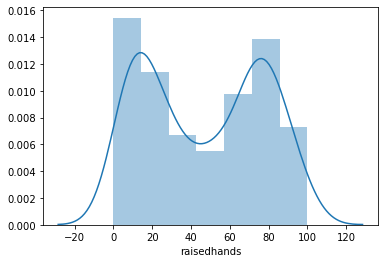

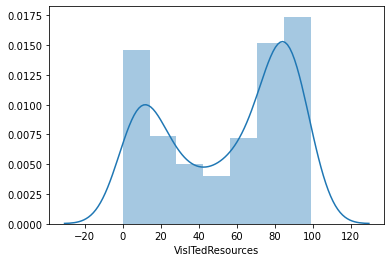

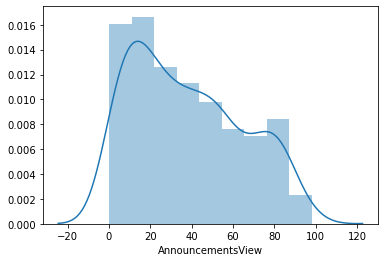

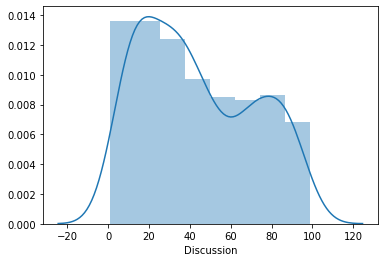

In [6]:
labels=['raisedhands','VisITedResources','AnnouncementsView','Discussion']
for i in range(len(labels)):
    plt.figure()
    sns.distplot(data[labels[i]])
    plt.xlabel(labels[i])

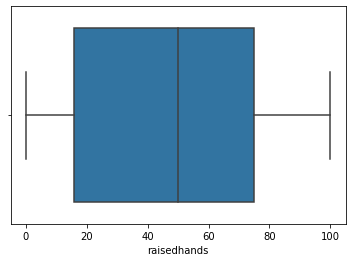

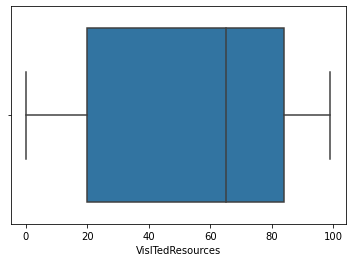

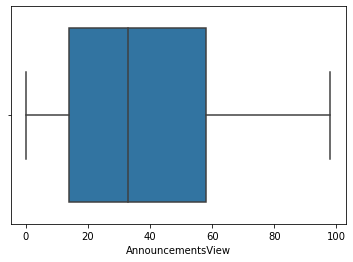

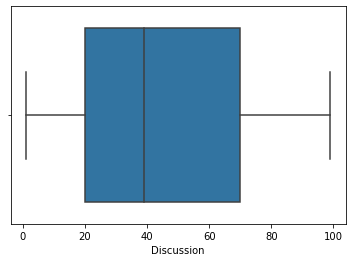

In [7]:
labels=['raisedhands','VisITedResources','AnnouncementsView','Discussion']
for i in range(len(labels)):
    plt.figure()
    sns.boxplot(x=data[labels[i]])
    plt.xlabel(labels[i])

In [8]:
outliers=[]
def detect_outlier(data_1):
    threshold=3
    mean1=np.mean(data_1)
    std1=np.std(data_1)
    
    for y in data_1:
        z_score=(y-mean1)/std1
        if np.abs(z_score)>threshold:
            outliers.append(y)
            
            
    return outliers

In [9]:
detect_outlier(data['raisedhands'])

[]

In [10]:
detect_outlier(data['VisITedResources'])

[]

In [11]:
detect_outlier(data['AnnouncementsView'])

[]

In [12]:
detect_outlier(data['Discussion'])

[]

In [13]:
objdata.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

#there are no outliers in continuous variables 

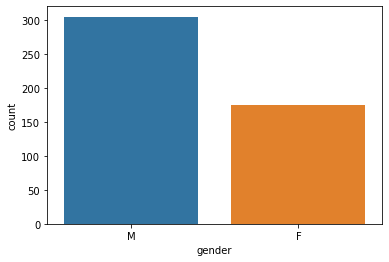

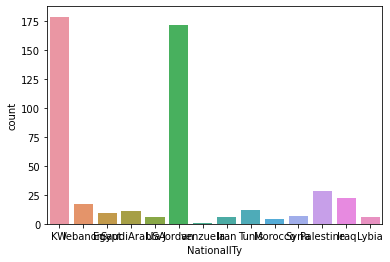

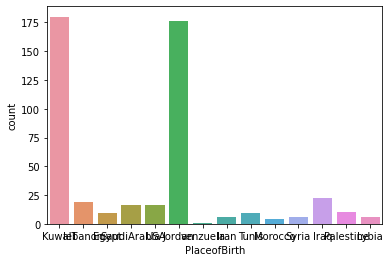

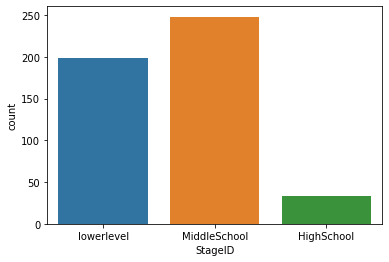

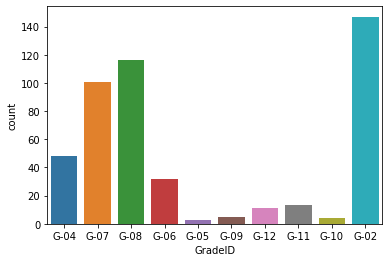

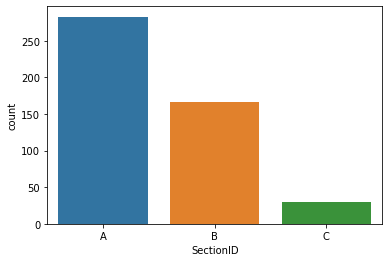

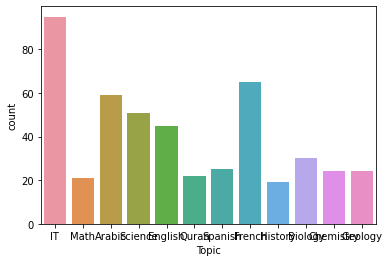

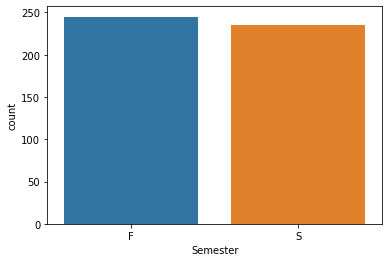

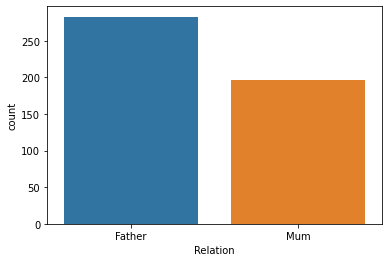

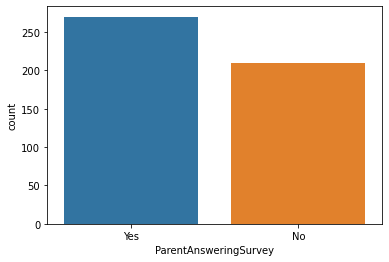

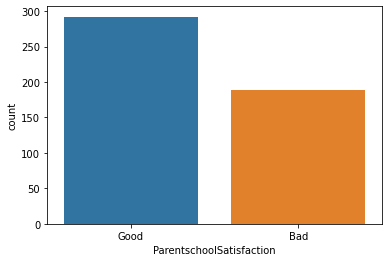

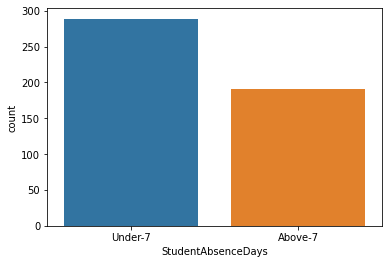

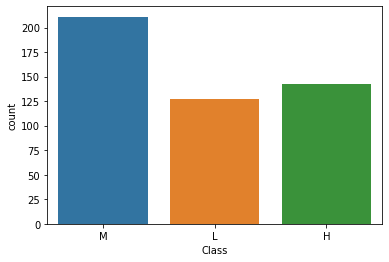

In [14]:
labels=['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']
for i in range(len(labels)):
    plt.figure()
    sns.countplot(x=data[labels[i]])
    plt.xlabel(labels[i])

From the above data we get to know that we should predict the student performance using knn & naive bayes so here the student 
results are shown in a particular variable called "Class" so here class is our (Target/dependent/Response)variable 

now we had shown how data is distributed in the above codes and graphs now we need to find correlation between variables to find out the best input features for creating model

so to find the correlation between cont and cat variable which is not dicotomous we converted the target cat variable onject type to int type to find the correlation

In [15]:
DATA=data.copy()

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [17]:
dat=data.copy()
dat['Class'] = label_encoder.fit_transform(dat['Class'])
dat['Class']=dat['Class'].astype('int64')

In [18]:
intDATA=dat.select_dtypes(include='int64')
intDATA.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
0,15,16,2,20,2
1,20,20,3,25,2
2,10,7,0,30,1
3,30,25,5,35,1
4,40,50,12,50,2


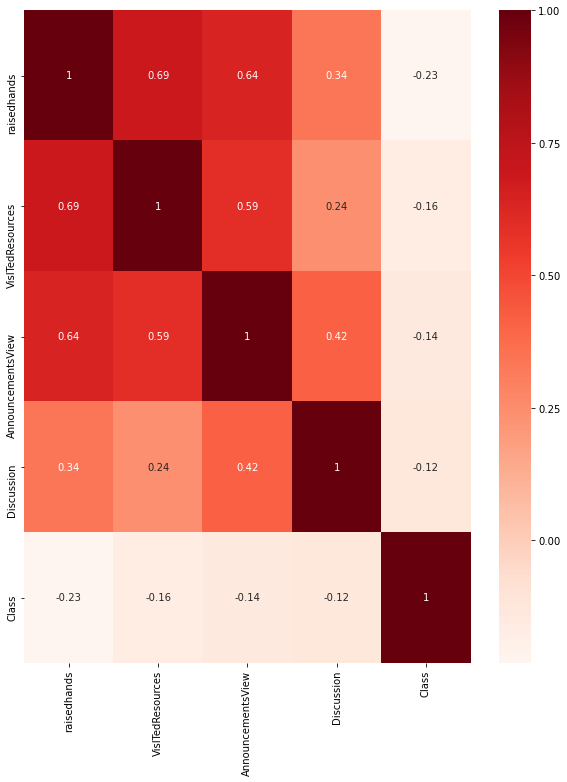

In [19]:
plt.figure(figsize=(10,12))
cor = intDATA.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [20]:
corr=intDATA.corr()
corr.nlargest(5,'Class')['Class']

Class                1.000000
Discussion          -0.121971
AnnouncementsView   -0.143996
VisITedResources    -0.161748
raisedhands         -0.231016
Name: Class, dtype: float64

In [21]:
from scipy.stats import pearsonr

In [24]:
corr=[]
for i in intDATA:
    x=pearsonr(intDATA[i],DATA['Class'])
    corr.append(x)
corr

[(-0.23101578434712638, 3.096280642820022e-07),
 (-0.16174802157041718, 0.0003737784433080825),
 (-0.1439958999662884, 0.0015611683154396253),
 (-0.1219710686670534, 0.007466682873850967),
 (1.0, 0.0)]

In [25]:
x1=np.array(corr)
pvalue1=pd.Series(x1[:,1],index=intDATA.columns)
pvalue1

raisedhands          3.096281e-07
VisITedResources     3.737784e-04
AnnouncementsView    1.561168e-03
Discussion           7.466683e-03
Class                0.000000e+00
dtype: float64

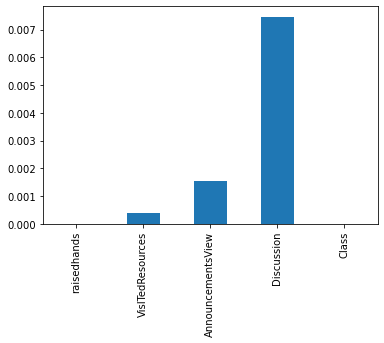

In [26]:
pvalue1.plot.bar()

In [27]:
DATA=data.copy()

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
objdata.columns


Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

In [30]:
DATA

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [31]:
DATA.columns


Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [37]:
label_encoder = LabelEncoder()
DATA['gender'] = label_encoder.fit_transform(DATA['gender'])
DATA['NationalITy'] = label_encoder.fit_transform(DATA['NationalITy'])
DATA['PlaceofBirth'] = label_encoder.fit_transform(DATA['PlaceofBirth'])
DATA['StageID'] = label_encoder.fit_transform(DATA['StageID'])
DATA['SectionID'] = label_encoder.fit_transform(DATA['SectionID'])
DATA['Topic'] = label_encoder.fit_transform(DATA['Topic'])
DATA['Semester'] = label_encoder.fit_transform(DATA['Semester'])
DATA['Relation'] = label_encoder.fit_transform(DATA['Relation'])
DATA['ParentAnsweringSurvey'] = label_encoder.fit_transform(DATA['ParentAnsweringSurvey'])
DATA['ParentschoolSatisfaction'] = label_encoder.fit_transform(DATA['ParentschoolSatisfaction'])
DATA['StudentAbsenceDays'] = label_encoder.fit_transform(DATA['StudentAbsenceDays'])
DATA['Class'] = label_encoder.fit_transform(DATA['Class'])


# KNN

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
u=DATA.drop(['SectionID','StageID','Semester','GradeID','Discussion'],axis=1)
v=DATA['Class']
u=np.array(u)
v=np.array(v)

In [41]:
u_train, u_test, v_train, v_test = train_test_split(u, v, test_size=0.3, random_state=1)

In [42]:
k=np.arange(1,25)
train_accuracy=np.empty(len(k))
test_accuracy=np.empty(len(k))
for i,k in enumerate(k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(u_train,v_train)
    train_accuracy[i]=knn.score(u_train,v_train)
    test_accuracy[i]=knn.score(u_test,v_test)
    print(train_accuracy[i])
    print(test_accuracy[i])

1.0
0.5694444444444444
0.8363095238095238
0.5902777777777778
0.8035714285714286
0.6041666666666666
0.7738095238095238
0.5972222222222222
0.75
0.5972222222222222
0.7202380952380952
0.6111111111111112
0.6875
0.5972222222222222
0.7113095238095238
0.6319444444444444
0.6964285714285714
0.5763888888888888
0.6755952380952381
0.6319444444444444
0.6904761904761905
0.6111111111111112
0.6845238095238095
0.6597222222222222
0.6815476190476191
0.6319444444444444
0.6845238095238095
0.625
0.6904761904761905
0.6319444444444444
0.6815476190476191
0.6736111111111112
0.6755952380952381
0.6597222222222222
0.6845238095238095
0.6527777777777778
0.6785714285714286
0.625
0.6785714285714286
0.6319444444444444
0.6755952380952381
0.6388888888888888
0.6904761904761905
0.6666666666666666
0.6845238095238095
0.6666666666666666
0.6875
0.6527777777777778


In [43]:
k=np.arange(1,25)
k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

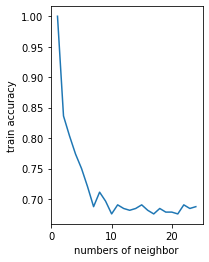

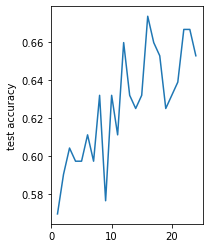

In [44]:
plt.subplot(1,2,1)
plt.plot(k,train_accuracy)
plt.xlabel('numbers of neighbor')
plt.ylabel('train accuracy')
plt.show()
plt.subplot(1,2,2)
plt.plot(k,test_accuracy)
plt.ylabel('test accuracy')
plt.show()

In [55]:
model=KNeighborsClassifier(n_neighbors=x[0],p=1)
model.fit(u_train,v_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=1,
                     weights='uniform')

In [56]:
v_pred=model.predict(u_test)
v_pred

array([2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 1, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 2, 1, 2, 0, 0, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1,
       2, 2, 2, 0, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0,
       2, 0, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 0,
       2, 1, 2, 1, 2, 0, 0, 2, 1, 1, 2, 2])

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(v_test,v_pred)

0.7152777777777778

In [58]:
model.score(u_train,v_train)

0.7291666666666666

In [59]:
confusion_matrix(v_test,v_pred)

array([[31,  2, 22],
       [ 0, 30,  3],
       [ 8,  6, 42]], dtype=int64)

In [60]:
print(classification_report(v_test,v_pred))

              precision    recall  f1-score   support

           0       0.79      0.56      0.66        55
           1       0.79      0.91      0.85        33
           2       0.63      0.75      0.68        56

    accuracy                           0.72       144
   macro avg       0.74      0.74      0.73       144
weighted avg       0.73      0.72      0.71       144



In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
conmat = confusion_matrix(v_test, v_pred)
print('Confusion matrix\n\n', conmat)

print('\nTrue Positives(tp) = ', conmat[0,0])

print('\nTrue Negatives(tn) = ', conmat[1,1])

print('\nFalse Positives(fp) = ', conmat[0,1])

print('\nFalse Negatives(fn) = ', conmat[1,0])

Confusion matrix

 [[31  2 22]
 [ 0 30  3]
 [ 8  6 42]]

True Positives(tp) =  31

True Negatives(tn) =  30

False Positives(fp) =  2

False Negatives(fn) =  0


In [63]:
tp = conmat[0,0]
tn = conmat[1,1]
fp = conmat[0,1]
fn = conmat[1,0]

In [64]:
classification_accuracy = (tp + tn) / float(tp + tn + fp + fn)
print('Classification accuracy knn : {0:0.4f}'.format(classification_accuracy))

Classification accuracy knn : 0.9683


In [65]:
classification_error = (fp + fn) / float(tp + tn + fp + fn)
print('Classification error knn : {0:0.4f}'.format(classification_error))

Classification error knn : 0.0317


In [66]:
precision = tp / float(tp + fp)
print('Precision knn : {0:0.4f}'.format(precision))

Precision knn : 0.9394


In [67]:
recall = tp / float(tp + fn)
print('Recall or Sensitivity knn: {0:0.4f}'.format(recall))

Recall or Sensitivity knn: 1.0000


In [68]:
true_positive_rate = tp / float(tp + fn)
print('True Positive Rate knn : {0:0.4f}'.format(true_positive_rate))

True Positive Rate knn : 1.0000


In [69]:
false_positive_rate = fp / float(fp + tn)
print('False Positive Rate knn: {0:0.4f}'.format(false_positive_rate))

False Positive Rate knn: 0.0625


In [70]:
specificity = tn / (tn + fp)
print('Specificity knn: {0:0.4f}'.format(specificity))

Specificity knn: 0.9375


# naive bayes

In [71]:
x=DATA.drop(['SectionID','StageID','Semester','Class','GradeID','Discussion'],axis=1)
y=DATA['Class']
x=np.array(x)
y=np.array(y)

In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [73]:
x=sc.fit_transform(x)
x

array([[ 0.7574764 , -0.1402013 , -0.15155299, ...,  0.8819171 ,
         0.80239368,  0.81295735],
       [ 0.7574764 , -0.1402013 , -0.15155299, ...,  0.8819171 ,
         0.80239368,  0.81295735],
       [ 0.7574764 , -0.1402013 , -0.15155299, ..., -1.13389342,
        -1.24627103, -1.23007683],
       ...,
       [-1.32017315, -0.54560266, -0.53241913, ..., -1.13389342,
        -1.24627103,  0.81295735],
       [-1.32017315, -0.54560266, -0.53241913, ..., -1.13389342,
        -1.24627103, -1.23007683],
       [-1.32017315, -0.54560266, -0.53241913, ..., -1.13389342,
        -1.24627103, -1.23007683]])

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=6)

In [76]:
from sklearn.naive_bayes import GaussianNB

In [77]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)

In [78]:
y_pred

array([0, 2, 2, 0, 2, 0, 2, 0, 2, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0,
       1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 1, 2, 0, 0, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2,
       2, 0, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0,
       1, 2, 0, 2, 2, 1, 2, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1,
       0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1])

In [79]:
gnb.score(x_test,y_test)

0.7239583333333334

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test,y_pred)))


Model accuracy score: 0.7240


In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[49  1 10]
 [ 0 40  7]
 [23 12 50]]

True Positives(TP) =  49

True Negatives(TN) =  40

False Positives(FP) =  1

False Negatives(FN) =  0


In [84]:
from sklearn.metrics import classification_report

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74        60
           1       0.75      0.85      0.80        47
           2       0.75      0.59      0.66        85

    accuracy                           0.72       192
   macro avg       0.73      0.75      0.73       192
weighted avg       0.73      0.72      0.72       192



In [86]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [87]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

In [88]:
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9889


In [89]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

In [90]:
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0111


In [91]:
precision = TP / float(TP + FP)

In [92]:
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9800


In [93]:
recall = TP / float(TP + FN)

In [94]:
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [95]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 1.0000


In [96]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0244


In [97]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9756
